In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
#%run vc.ipynb as vc

In [12]:
df_raw = pd.read_stata('BDBR7RFL.DTA')#df_raw.to_csv('BDBR7RFL.DTA')

In [13]:
#df_raw = pd.read_csv('BDBR7RFL.csv',low_memory=False)

# Initial Data Set

In [14]:
df1 = df_raw.copy()
df1.head()

,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,v007,...,s630o,s630p,s630q,s630r,s630s,s630t,s630u,s630v,s630w,s630y
0,1 4 2,1,BD7,1,4,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 4 2,2,BD7,1,4,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 4 2,3,BD7,1,4,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 4 2,4,BD7,1,4,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 8 3,1,BD7,1,8,3,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Shape

In [15]:
df1.shape

(47828, 1227)

# Initially Selected Features

In [16]:
features = pd.read_excel('Feature.xlsx','Sheet2')
features

,features,label,Short_Description,Description
0,v012,0,Current age of respondent,Current age of respondent
1,v024,0,Region of residence,Region of residence
2,v025,0,Type of place of residence,Type of place of residence
3,v104,0,Time lived in current place of residence,Time lived in current place of residence
4,v106,0,Ever attended school,Ever attended school
5,v107,0,Highest grade at that level,Highest grade at that level
6,v113,0,Main source of drinking water for members of t...,Main source of drinking water for members of t...
7,v116,0,Type of toilet facility in the household,Type of toilet facility in the household
8,v119,0,Household has Electricity,Household has Electricity
9,v120,0,Household has Radio,Household has Radio


In [17]:
modified_features = pd.read_excel('Feature.xlsx','Sheet3')
modified_features

,Features,Label,Description,P-value with_respect_to m17(C-Section) (assosiasion yes/no,Remrks
0,v012,0,Current age of respondent,NaN,NaN
1,v024,0,Region of residence,NaN,NaN
2,v025,0,Type of place of residence,NaN,NaN
3,v104,0,Time lived in current place of residence,NaN,NaN
4,v113,0,Main source of drinking water for members of t...,NaN,NaN
5,v116,0,Type of toilet facility in the household,NaN,NaN
6,v119,0,Household has Electricity,NaN,NaN
7,v122,0,Household has Refrigerator,NaN,NaN
8,v127,0,Main material of the floor,NaN,NaN
9,v128,0,Main material of the walls,NaN,NaN


# Dataset of Selected Features

In [18]:
df2= df1[features['features']]
df2.head()

,v012,v024,v025,v104,v106,v107,v113,v116,v119,v120,...,v705,v714,v716,b0,b4,b5,m15,m17,m17a,m45
0,39,barisal,rural,25,primary,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,services,no,not working and didn't work in last 12 months,single birth,female,yes,NaN,NaN,NaN,NaN
1,39,barisal,rural,25,primary,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,services,no,not working and didn't work in last 12 months,single birth,female,yes,NaN,NaN,NaN,NaN
2,39,barisal,rural,25,primary,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,services,no,not working and didn't work in last 12 months,single birth,male,yes,NaN,NaN,NaN,NaN
3,39,barisal,rural,25,primary,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,services,no,not working and didn't work in last 12 months,single birth,female,yes,NaN,NaN,NaN,NaN
4,28,barisal,rural,12,secondary,2.0,tube well or borehole,pit latrine with slab,no,no,...,skilled manual,no,not working and didn't work in last 12 months,single birth,male,yes,NaN,NaN,NaN,NaN


features['row_with_counts']=0

for i in range(len(df_new.columns)):
    features.iloc[i,-1] = df_new.iloc[:,i].dropna().value_counts().sum()

features.head(50)

# Filtering Based on C-Section Data Availability 

In [19]:
df3 = 0
df3 = df2[(df2['m17'] == 'yes') | (df2['m17'] == 'no')]
df3.head()

,v012,v024,v025,v104,v106,v107,v113,v116,v119,v120,...,v705,v714,v716,b0,b4,b5,m15,m17,m17a,m45
5,18,barisal,rural,1,higher,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,professional/technical/managerial,no,not working and didn't work in last 12 months,single birth,male,yes,private clinic,yes,before labor started,yes
18,35,barisal,rural,19,primary,5.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,skilled manual,no,not working and didn't work in last 12 months,single birth,male,yes,respondent's home,no,NaN,yes
26,21,barisal,rural,visitor,secondary,5.0,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,skilled manual,no,not working and didn't work in last 12 months,single birth,male,yes,private clinic,yes,after labor started,yes
27,21,barisal,rural,visitor,secondary,5.0,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,skilled manual,no,not working and didn't work in last 12 months,single birth,female,no,respondent's home,no,NaN,NaN
30,31,barisal,rural,18,primary,1.0,tube well or borehole,hanging toilet/latrine,no,no,...,sales,no,not working and didn't work in last 12 months,single birth,male,yes,respondent's home,no,NaN,no


# Filtered Dataset Shape

In [20]:
df3.shape

(5299, 49)

dfnew = dfnew.dropna()#.reset_index()
dfnew

In [21]:
df3 = df3.reset_index()
del df3['index']
df3.head()

,v012,v024,v025,v104,v106,v107,v113,v116,v119,v120,...,v705,v714,v716,b0,b4,b5,m15,m17,m17a,m45
0,18,barisal,rural,1,higher,2.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,professional/technical/managerial,no,not working and didn't work in last 12 months,single birth,male,yes,private clinic,yes,before labor started,yes
1,35,barisal,rural,19,primary,5.0,tube well or borehole,pit latrine without slab/open pit,no,no,...,skilled manual,no,not working and didn't work in last 12 months,single birth,male,yes,respondent's home,no,NaN,yes
2,21,barisal,rural,visitor,secondary,5.0,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,skilled manual,no,not working and didn't work in last 12 months,single birth,male,yes,private clinic,yes,after labor started,yes
3,21,barisal,rural,visitor,secondary,5.0,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,skilled manual,no,not working and didn't work in last 12 months,single birth,female,no,respondent's home,no,NaN,NaN
4,31,barisal,rural,18,primary,1.0,tube well or borehole,hanging toilet/latrine,no,no,...,sales,no,not working and didn't work in last 12 months,single birth,male,yes,respondent's home,no,NaN,no


In [22]:
df3.to_csv("raw.csv")

In [23]:
df3.shape

(5299, 49)

In [24]:
df4 = df3.copy()

# Feature Engineering

In [25]:
features_temp = features.copy()
features_temp.index = features['features']

# variable : v104,Time lived in current place of residence

In [26]:
features_temp["Short_Description"]['v104'],df4.v104.value_counts()

('Time lived in current place of residence',
 visitor    686
 always     579
 3          464
 2          401
 4          380
 1          272
 5          264
 7          243
 8          212
 10         198
 6          190
 0          189
 9          185
 12         156
 11         152
 15         107
 13         100
 14         100
 16          89
 17          71
 18          59
 19          55
 20          47
 22          22
 23          19
 21          17
 24          16
 26           6
 25           5
 30           5
 27           4
 32           2
 33           1
 36           1
 31           1
 29           1
 34           0
 35           0
 37           0
 38           0
 39           0
 40           0
 41           0
 42           0
 43           0
 46           0
 28           0
 Name: v104, dtype: int64)

In [27]:
df4["new_v104"] = 0
for i in range(len(df4)):
    if df4.v104[i] == 'visitor':
        df4.iloc[i,-1] = 'visitor'
    
    elif df4.v104[i] == 'always':
        df4.iloc[i,-1] = "permanent_resident"
    
    else:
        df4.iloc[i,-1] = "new_resident duration between 0 to 33 days"        

        
df4.v104 = df4.iloc[:,-1]
df4 = df4.drop(['new_v104'],axis='columns')

In [28]:
features_temp["Short_Description"]['v104'],df4.v104.value_counts()

('Time lived in current place of residence',
 new_resident duration between 0 to 33 days    4034
 visitor                                        686
 permanent_resident                             579
 Name: v104, dtype: int64)

# variable : v107,Highest grade at that level (variable v106)

In [29]:
df5 = df4.copy()
features_temp["Short_Description"]['v107'],df5.v107.value_counts()

('Highest grade at that level',
 2.0                                 1140
 4.0                                 1104
 5.0                                  899
 3.0                                  707
 no years completed at level v106     511
 1.0                                  465
 6.0                                   94
 7.0                                   30
 8.0                                    3
 Name: v107, dtype: int64)

In [30]:
df5["new_v107"] = 0
for i in range(len(df5)):
    if df5.v107[i] == 'no years completed at level v106':
        df5.iloc[i,-1] = 0
    else:
        df5.iloc[i,-1] = df5.v107[i]
        
df5.v107 = df5.iloc[:,-1]
df5 = df5.drop(['new_v107'],axis='columns')

In [31]:
features_temp["Short_Description"]['v107'],df5.v107.value_counts()

('Highest grade at that level',
 2.0    1140
 4.0    1104
 5.0     899
 3.0     707
 0.0     511
 1.0     465
 6.0      94
 7.0      30
 8.0       3
 Name: v107, dtype: int64)

# variable : v120 & v121, radio & television, converted to  v120+v121 (get news yes/no, not a dejure resident = 99

In [32]:
df6 = df5.copy()
features_temp["Short_Description"]['v120'],df6.v120.value_counts()

('Household has Radio',
 no                       4543
 not a dejure resident     713
 yes                        43
 Name: v120, dtype: int64)

In [33]:
features_temp["Short_Description"]['v121'],df6.v121.value_counts()

('Household has Television',
 no                       2453
 yes                      2133
 not a dejure resident     713
 Name: v121, dtype: int64)

In [34]:
df6["v120v121"] = 0
for i in range(len(df6)):
    if df6.v120[i] == 'no' and df6.v121[i] == 'no':
        df6.iloc[i,-1] = 'no'                                                        #pp.append(0)
    elif df6.v120[i] == 'yes' or df6.v121[i] == 'yes':
        df6.iloc[i,-1] = 'yes'                                                       #pp.append(1)
    elif df6.v120[i] == 'not a dejure resident' and df6.v121[i] == 'not a dejure resident':
        df6.iloc[i,-1] = 'not a dejure resident'       #not a dejure resident                             #pp.append(99)

df6 = df6.drop(['v120','v121'],axis='columns')

In [35]:
print("television/radio")
df6["v120v121"].value_counts()

television/radio


no                       2439
yes                      2147
not a dejure resident     713
Name: v120v121, dtype: int64

# variable : v123, v124 & v125, bicycle, motorcycle_scooter & car_truck, converted to v123+v124+v125 (personal transport yes/no, not a dejure resident = 99

In [36]:
df7 = df6.copy()
features_temp["Short_Description"]['v123'],df7.v123.value_counts()

('Household has Bicycle',
 no                       3467
 yes                      1119
 not a dejure resident     713
 Name: v123, dtype: int64)

In [37]:
features_temp["Short_Description"]['v124'],df7.v124.value_counts()

('Household has Motorcycle_scooter',
 no                       4124
 not a dejure resident     713
 yes                       462
 Name: v124, dtype: int64)

In [38]:
features_temp["Short_Description"]['v125'],df7.v125.value_counts()

('Household has Car_truck',
 no                       4542
 not a dejure resident     713
 yes                        44
 Name: v125, dtype: int64)

In [39]:
df7["v123v124v125"] = 0
for i in range(len(df7)):
    if df7.v123[i] == 'no' and df7.v124[i] == 'no' and df7.v125[i] == 'no':
        df7.iloc[i,-1] = 'no'                                                        #pp.append(0)
    elif df7.v123[i] == 'yes' or df7.v124[i] == 'yes' or df7.v125[i] == 'yes':
        df7.iloc[i,-1] = 'yes'                                                       #pp.append(1)
    elif df7.v123[i] == 'not a dejure resident' and df7.v124[i] == 'not a dejure resident' and df7.v125[i] == 'not a dejure resident':
        df7.iloc[i,-1] = 'not a dejure resident'       #not a dejure resident                             #pp.append(99)

df7 = df7.drop(['v123','v124','v125'],axis='columns')

In [40]:
print("bicycle/motorcycle_scooter/car_truck")
df7["v123v124v125"].value_counts()

bicycle/motorcycle_scooter/car_truck


no                       3130
yes                      1456
not a dejure resident     713
Name: v123v124v125, dtype: int64

# variable : v153, Whether the household has a telephone, (not a dejure resident = 99)

In [41]:
df8 = df7.copy()

In [42]:
features_temp["Short_Description"]['v153'],df8.v153.value_counts()

('Whether the household has a telephone',
 no                       4564
 not a dejure resident     713
 yes                        22
 Name: v153, dtype: int64)

In [43]:
df8["new_v153"] = 0
for i in range(len(df8)):
    if df8.v153[i] == 'no': #and df7.v124[i] == 'no' and df7.v125[i] == 'no':
        df8.iloc[i,-1] = 'no'                                                        #pp.append(0)
    elif df8.v153[i] == 'yes': #or df7.v124[i] == 'yes' or df7.v125[i] == 'yes':
        df8.iloc[i,-1] = 'yes'                                                       #pp.append(1)
    elif df8.v153[i] == 'not a dejure resident': #and df7.v124[i] == 'not a dejure resident' and df7.v125[i] == 'not a dejure resident':
        df8.iloc[i,-1] = 'not a dejure resident'       #not a dejure resident                             #pp.append(99)

df8['v153'] = df8['new_v153']        
df8 = df8.drop(['new_v153'],axis='columns')

In [44]:
features_temp["Short_Description"]['v153'],df8.v153.value_counts()

('Whether the household has a telephone',
 no                       4564
 not a dejure resident     713
 yes                        22
 Name: v153, dtype: int64)

# variable : v106,v107,v155 educated and can read or not

In [45]:
df9 = df8.copy()

In [46]:
features_temp["Short_Description"]['v155'],df9.v155.value_counts()

('Literacy indicates whether  can read a whole or part of a sentence showed. ',
 able to read whole sentence            4006
 cannot read at all                      744
 able to read only parts of sentence     548
 no card with required language            0
 blind/visually impaired                   0
 Name: v155, dtype: int64)

In [47]:
df9.v106.value_counts()

secondary       2534
primary         1477
higher           942
no education     346
Name: v106, dtype: int64

In [48]:
df9.v107.value_counts()

2.0    1140
4.0    1104
5.0     899
3.0     707
0.0     511
1.0     465
6.0      94
7.0      30
8.0       3
Name: v107, dtype: int64

In [49]:
df9.v155.value_counts()

able to read whole sentence            4006
cannot read at all                      744
able to read only parts of sentence     548
no card with required language            0
blind/visually impaired                   0
Name: v155, dtype: int64

In [50]:
df9['v106v107v155'] = 0

In [51]:
for i in range(len(df9)):
    if df9.v106[i] == "secondary" or df9.v106[i] == "primary" or df9.v106[i] == "higher" and df9.v107[i] != 0:
        if df9.v155[i] == "able to read whole sentence" or df9.v155[i] == "able to read only parts of sentence":
            df9.iloc[i,-1] = "literate" #literate - went to school and can read
        else:
            df9.iloc[i,-1] = "not literate" #not literate - went to school and can't read
    else:
        df9.iloc[i,-1] = "illiterate" #illiterate - did't go to school and can't read

In [52]:
df9['v106v107v155'].value_counts()

literate        4285
illiterate       602
not literate     412
Name: v106v107v155, dtype: int64

In [53]:
df9 = df9.drop(['v106','v107','v155'],axis='columns')

# variable : v157, v158, v159, get entertained / get news from newspaper/tv/radio/

In [54]:
df10 = df9.copy()

In [55]:
features_temp["Short_Description"]['v157'],df10.v157.value_counts()

('Reading a newspaper or magazine at least once a week',
 not at all               4712
 less than once a week     401
 at least once a week      186
 Name: v157, dtype: int64)

In [56]:
features_temp["Short_Description"]['v158'],df10.v158.value_counts()

('Listening to the radio at least once a week',
 not at all               4994
 less than once a week     193
 at least once a week      112
 Name: v158, dtype: int64)

In [57]:
features_temp["Short_Description"]['v159'],df10.v159.value_counts()

('Watching television at least once a week',
 at least once a week     2786
 not at all               2048
 less than once a week     465
 Name: v159, dtype: int64)

In [58]:
df10['v157v158v159'] = 0
for i in range(len(df10)):
    if df10.v157[i] == 'not at all' and df10.v157[i] == df10.v158[i] and df10.v157[i] == df10.v159[i]:
        df10.iloc[i,-1] = 'not at all'
    else:
         df10.iloc[i,-1] = 'get news/entertained'

In [59]:
df10 = df10.drop(['v157','v158','v159'],axis='columns')

In [60]:
df10['v157v158v159'].value_counts()

get news/entertained    3378
not at all              1921
Name: v157v158v159, dtype: int64

# variable: v437,v438,v445, weight/10, height/10 and BMI/100

In [61]:
df11 = df10.copy()
features_temp["Short_Description"]['v437'],df11.v437.value_counts()

('Weight of the respondent in kilograms.(must divide by 10)',
 refused    50
 481.0      37
 471.0      35
 461.0      35
 451.0      34
            ..
 278.0       0
 817.0       0
 818.0       0
 819.0       0
 240.0       0
 Name: v437, Length: 637, dtype: int64)

In [62]:
a = 0
a = df11.v437.astype(str)
for i in range(len(df10)):
    if a[i] == 'not present':
        a[i] = "NaN"
    elif a[i] == 'refused':
        a[i] = "NaN"
    elif a[i] == 'other':
        a[i] = "NaN"
        
a= a.astype(float)
for i in range(len(df10)):
        a[i] = a[i]/10
df11.v437 = a

In [63]:
features_temp["Short_Description"]['v437'],df11.v437.value_counts()

('Weight of the respondent in kilograms.(must divide by 10)',
 48.1    37
 46.1    35
 47.1    35
 45.1    34
 45.2    32
         ..
 72.3     1
 67.0     1
 85.4     1
 90.3     1
 83.2     1
 Name: v437, Length: 509, dtype: int64)

In [64]:
features_temp["Short_Description"]['v438'],df11.v438.value_counts()

('Height of the respondent in centimeters. (must divide by 10)',
 1516.0    55
 1532.0    54
 1503.0    53
 1546.0    51
 1512.0    51
           ..
 1323.0     0
 1326.0     0
 1329.0     0
 1330.0     0
 1007.0     0
 Name: v438, Length: 386, dtype: int64)

In [65]:
a = 0
a = df11.v438.astype(str)
for i in range(len(df10)):
    if a[i] == 'not present':
        a[i] = "NaN"
    elif a[i] == 'refused':
        a[i] = "NaN"
    elif a[i] == 'other':
        a[i] = "NaN"
        
a= a.astype(float)
for i in range(len(df10)):
        a[i] = a[i]/10
df11.v438 = a

In [66]:
features_temp["Short_Description"]['v438'],df11.v438.value_counts()

('Height of the respondent in centimeters. (must divide by 10)',
 151.6    55
 153.2    54
 150.3    53
 151.2    51
 154.6    51
          ..
 134.7     1
 137.6     1
 130.5     1
 137.9     1
 137.7     1
 Name: v438, Length: 314, dtype: int64)

In [67]:
features_temp["Short_Description"]['v445'],df11.v445.value_counts()

("Body mass index (BMI), or Quetelet's index, for the respondent (divide by 100)",
 1978.0           14
 2334.0           13
 2071.0           13
 1920.0           13
 2038.0           13
                  ..
 3051.0            0
 3054.0            0
 3055.0            0
 3056.0            0
 flagged cases     0
 Name: v445, Length: 2083, dtype: int64)

In [68]:
a = 0
a = df11.v445.astype(str)
for i in range(len(df10)):
    if a[i] == 'not present':
        a[i] = "NaN"
    elif a[i] == 'refused':
        a[i] = "NaN"
    elif a[i] == 'other':
        a[i] = "NaN"
        
a= a.astype(float)
for i in range(len(df10)):
        a[i] = a[i]/100
df11.v445 = a

In [69]:
features_temp["Short_Description"]['v445'],df11.v445.value_counts()

("Body mass index (BMI), or Quetelet's index, for the respondent (divide by 100)",
 19.78    14
 20.71    13
 19.20    13
 23.34    13
 20.38    13
          ..
 28.05     1
 26.08     1
 30.37     1
 28.46     1
 31.40     1
 Name: v445, Length: 1513, dtype: int64)

In [70]:
df11

,v012,v024,v025,v104,v113,v116,v119,v122,v127,v128,...,b4,b5,m15,m17,m17a,m45,v120v121,v123v124v125,v106v107v155,v157v158v159
0,18,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,private clinic,yes,before labor started,yes,no,no,literate,not at all
1,35,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,dirt,...,male,yes,respondent's home,no,NaN,yes,no,yes,literate,not at all
2,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,yes,after labor started,yes,not a dejure resident,not a dejure resident,literate,not at all
3,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,female,no,respondent's home,no,NaN,NaN,not a dejure resident,not a dejure resident,literate,not at all
4,31,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,hanging toilet/latrine,no,no,earth/sand,cement,...,male,yes,respondent's home,no,NaN,no,no,no,not literate,not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,34,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to septic tank,yes,yes,cement,stone with lime/cement,...,female,yes,private clinic,yes,before labor started,yes,no,no,literate,get news/entertained
5295,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,yes,not a dejure resident,not a dejure resident,literate,get news/entertained
5296,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,NaN,not a dejure resident,not a dejure resident,literate,get news/entertained
5297,30,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to pit latrine,yes,yes,cement,stone with lime/cement,...,male,yes,district hospital,yes,before labor started,no,yes,yes,literate,get news/entertained


# variable : m17a,Timing on decision for caesarean section	

In [71]:
df11

,v012,v024,v025,v104,v113,v116,v119,v122,v127,v128,...,b4,b5,m15,m17,m17a,m45,v120v121,v123v124v125,v106v107v155,v157v158v159
0,18,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,private clinic,yes,before labor started,yes,no,no,literate,not at all
1,35,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,dirt,...,male,yes,respondent's home,no,NaN,yes,no,yes,literate,not at all
2,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,yes,after labor started,yes,not a dejure resident,not a dejure resident,literate,not at all
3,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,female,no,respondent's home,no,NaN,NaN,not a dejure resident,not a dejure resident,literate,not at all
4,31,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,hanging toilet/latrine,no,no,earth/sand,cement,...,male,yes,respondent's home,no,NaN,no,no,no,not literate,not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,34,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to septic tank,yes,yes,cement,stone with lime/cement,...,female,yes,private clinic,yes,before labor started,yes,no,no,literate,get news/entertained
5295,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,yes,not a dejure resident,not a dejure resident,literate,get news/entertained
5296,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,NaN,not a dejure resident,not a dejure resident,literate,get news/entertained
5297,30,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to pit latrine,yes,yes,cement,stone with lime/cement,...,male,yes,district hospital,yes,before labor started,no,yes,yes,literate,get news/entertained


In [72]:
df12 = df11.copy()
features_temp["Short_Description"]['m17a'],df12.m17a.value_counts()

('Timing on decision for caesarean section',
 before labor started    1005
 after labor started      735
 Name: m17a, dtype: int64)

In [73]:
df12['new_m17a'] = 0
for i in range(len(df12)):
    if df12['m17a'][i] == "before labor started":
        df12.iloc[i,-1] = "before labor started"
    elif df12['m17a'][i] == "after labor started":
        df12.iloc[i,-1] = "after labor started"
    else:
        df12.iloc[i,-1] = "no decision taken"

In [74]:
df12['m17a'] = df12['new_m17a']
df12 = df12.drop(['new_m17a'],axis='columns')

In [75]:
features_temp["Short_Description"]['m17a'],df12.m17a.value_counts()

('Timing on decision for caesarean section',
 no decision taken       3559
 before labor started    1005
 after labor started      735
 Name: m17a, dtype: int64)

# Testing NaN value

In [76]:
df12.shape

(5299, 42)

In [77]:
for i in range(len(df12.columns)):
    x = df12.iloc[:,i].value_counts().sum()
    if x != len(df12.m17):
        print("features with NaN values:",i,df12.columns[i],x)

features with NaN values: 19 v160 5263
features with NaN values: 20 v161 5294
features with NaN values: 23 v437 5219
features with NaN values: 24 v438 5219
features with NaN values: 25 v445 5219
features with NaN values: 27 v701 5230
features with NaN values: 28 v705 5291
features with NaN values: 30 v716 5296
features with NaN values: 37 m45 5007


# Droping NaN values

In [78]:
df12 = df12.dropna()

In [79]:
for i in range(len(df12.columns)):
    x = df12.iloc[:,i].value_counts().sum()
    if x != len(df12.m17):
        print("features with NaN values:",i,df12.columns[i])

In [80]:
df12.shape

(4821, 42)

In [81]:
df12 = df12.reset_index()
del df12['index']
df12

,v012,v024,v025,v104,v113,v116,v119,v122,v127,v128,...,b4,b5,m15,m17,m17a,m45,v120v121,v123v124v125,v106v107v155,v157v158v159
0,18,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,private clinic,yes,before labor started,yes,no,no,literate,not at all
1,35,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,dirt,...,male,yes,respondent's home,no,no decision taken,yes,no,yes,literate,not at all
2,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,yes,after labor started,yes,not a dejure resident,not a dejure resident,literate,not at all
3,31,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,hanging toilet/latrine,no,no,earth/sand,cement,...,male,yes,respondent's home,no,no decision taken,no,no,no,not literate,not at all
4,29,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,respondent's home,no,no decision taken,yes,no,no,literate,not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,35,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,no,no decision taken,yes,not a dejure resident,not a dejure resident,literate,get news/entertained
4817,24,sylhet,urban,new_resident duration between 0 to 33 days,tube well or borehole,flush to septic tank,yes,yes,ceramic tiles,stone with lime/cement,...,male,yes,respondent's home,no,no decision taken,yes,yes,yes,literate,get news/entertained
4818,34,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to septic tank,yes,yes,cement,stone with lime/cement,...,female,yes,private clinic,yes,before labor started,yes,no,no,literate,get news/entertained
4819,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,yes,not a dejure resident,not a dejure resident,literate,get news/entertained


In [82]:
drt = df12.copy()

In [83]:
drt.v152.min(),drt.v152.max()#value_counts()

(15, 95)

In [84]:
for i in range(len(drt.columns)):
    if drt.iloc[:,i].dtypes != 'int64' and drt.iloc[:,i].dtypes != 'float64':
        drt.iloc[:,i] = drt.iloc[:,i].astype("category")
        #print(df13.columns[i])
drt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   v012          4821 non-null   category
 1   v024          4821 non-null   category
 2   v025          4821 non-null   category
 3   v104          4821 non-null   category
 4   v113          4821 non-null   category
 5   v116          4821 non-null   category
 6   v119          4821 non-null   category
 7   v122          4821 non-null   category
 8   v127          4821 non-null   category
 9   v128          4821 non-null   category
 10  v129          4821 non-null   category
 11  v130          4821 non-null   category
 12  v135          4821 non-null   category
 13  v136          4821 non-null   category
 14  v138          4821 non-null   category
 15  v150          4821 non-null   category
 16  v151          4821 non-null   category
 17  v152          4821 non-null   category
 18  v153    

In [85]:
drt

,v012,v024,v025,v104,v113,v116,v119,v122,v127,v128,...,b4,b5,m15,m17,m17a,m45,v120v121,v123v124v125,v106v107v155,v157v158v159
0,18,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,private clinic,yes,before labor started,yes,no,no,literate,not at all
1,35,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,dirt,...,male,yes,respondent's home,no,no decision taken,yes,no,yes,literate,not at all
2,21,barisal,rural,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,yes,after labor started,yes,not a dejure resident,not a dejure resident,literate,not at all
3,31,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,hanging toilet/latrine,no,no,earth/sand,cement,...,male,yes,respondent's home,no,no decision taken,no,no,no,not literate,not at all
4,29,barisal,rural,new_resident duration between 0 to 33 days,tube well or borehole,pit latrine without slab/open pit,no,no,earth/sand,cement,...,male,yes,respondent's home,no,no decision taken,yes,no,no,literate,not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,35,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private clinic,no,no decision taken,yes,not a dejure resident,not a dejure resident,literate,get news/entertained
4817,24,sylhet,urban,new_resident duration between 0 to 33 days,tube well or borehole,flush to septic tank,yes,yes,ceramic tiles,stone with lime/cement,...,male,yes,respondent's home,no,no decision taken,yes,yes,yes,literate,get news/entertained
4818,34,sylhet,urban,new_resident duration between 0 to 33 days,piped into dwelling,flush to septic tank,yes,yes,cement,stone with lime/cement,...,female,yes,private clinic,yes,before labor started,yes,no,no,literate,get news/entertained
4819,23,sylhet,urban,visitor,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,not a dejure resident,...,male,yes,private medical college hospital,yes,before labor started,yes,not a dejure resident,not a dejure resident,literate,get news/entertained


In [74]:
drt.to_excel('Final_Data.xlsx', index=False)

# Testing Feature Datatype as it needs some further feature engineering

In [86]:
encoder = LabelEncoder()

In [87]:
fdf = drt.copy()

# Chi-Square and Kruskal Wallis Test for determining Feature dependency with C-section column

In [88]:
def Chi_Squared(x,y):
    contigency= pd.crosstab(x,y)
    c, p, dof, expected = chi2_contingency(contigency)
    v = c,p,dof
    return v

In [89]:
def Kruskal(x,y):
    
    f = encoder.fit_transform(x)
    v = stats.kruskal(f,y)
    return v
    #stats.pointbiserialr(f,fdf.v012),stats.kendalltau(fdf.v012, fdf.m17, initial_lexsort=True)

In [90]:
l = len(fdf.columns)
Chi_Squared_Values = pd.DataFrame({
    "features" : fdf.columns,
    "features_Data_Type": np.zeros(l),
    "Chi_square": np.zeros(l),
    "P_value": np.zeros(l),
    "Degree_of_freedom":np.zeros(l),
    "Decision":np.zeros(l)
})
#Chi_Squared_Values

In [91]:
for i in range(l):
    #if fdf.columns[i] != "v012" and fdf.columns[i] !="v152" and fdf.columns[i] !="v437" and fdf.columns[i] !="v438" and fdf.columns[i] !="v445":
    if fdf.iloc[:,i].dtypes != 'int64' and fdf.iloc[:,i].dtypes != 'float64':
        v = Chi_Squared(fdf.m17,fdf.iloc[:,i])
        Chi_Squared_Values.Degree_of_freedom[i] = v[2]
        Chi_Squared_Values.features_Data_Type[i] = "Categorical"
    else:
        #fdf.iloc[:,i] = fdf.iloc[:,i].astype(str).astype(float)
        v =  Kruskal(fdf.m17,fdf.iloc[:,i])
        Chi_Squared_Values.Degree_of_freedom[i] = 1
        Chi_Squared_Values.features_Data_Type[i] = "Numerical"
        
    #v = Chi_Squared(fdf.m17,fdf.iloc[:,i])
    Chi_Squared_Values.Chi_square[i,1] = round(v[0],2)
    Chi_Squared_Values.P_value[i,2] = round(v[1],4) #str(round(p,4))
    
    if v[1] >.05:
        Chi_Squared_Values.Decision[i] = "No"
    else:
        Chi_Squared_Values.Decision[i] = "Yes"

In [ ]:
Chi_Squared_Values.to_csv("Chi_Squared_ValuesLatest.csv")

In [92]:
Chi_Squared_Values

,features,features_Data_Type,Chi_square,P_value,Degree_of_freedom,Decision
0,v012,Categorical,43.52,0.1041,33.0,No
1,v024,Categorical,300.36,0.0000,7.0,Yes
2,v025,Categorical,112.19,0.0000,1.0,Yes
3,v104,Categorical,12.31,0.0021,2.0,Yes
4,v113,Categorical,103.67,0.0000,12.0,Yes
5,v116,Categorical,335.47,0.0000,9.0,Yes
6,v119,Categorical,187.09,0.0000,2.0,Yes
7,v122,Categorical,415.91,0.0000,2.0,Yes
8,v127,Categorical,366.34,0.0000,7.0,Yes
9,v128,Categorical,361.99,0.0000,12.0,Yes


# Total Eleminated Features

In [93]:
(Chi_Squared_Values.Decision == "No").sum()

4

# Label Encoding

In [94]:
df13 = fdf.copy()

In [95]:
for i in range(len(df13.columns)):
    if df13.iloc[:,i].dtypes != 'int64' and df13.iloc[:,i].dtypes != 'float64':
        df13.iloc[:,i] = encoder.fit_transform(df13.iloc[:,i])
        #print(df13.columns[i])

In [96]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   v012          4821 non-null   int64  
 1   v024          4821 non-null   int32  
 2   v025          4821 non-null   int32  
 3   v104          4821 non-null   int32  
 4   v113          4821 non-null   int32  
 5   v116          4821 non-null   int32  
 6   v119          4821 non-null   int32  
 7   v122          4821 non-null   int32  
 8   v127          4821 non-null   int32  
 9   v128          4821 non-null   int32  
 10  v129          4821 non-null   int32  
 11  v130          4821 non-null   int32  
 12  v135          4821 non-null   int32  
 13  v136          4821 non-null   int64  
 14  v138          4821 non-null   int64  
 15  v150          4821 non-null   int32  
 16  v151          4821 non-null   int32  
 17  v152          4821 non-null   int64  
 18  v153          4821 non-null 

In [97]:
for i in range(len(df13.columns)):
    if df13.iloc[:,i].dtypes != 'int64' and df13.iloc[:,i].dtypes != 'float64':
        df13.iloc[:,i] = df13.iloc[:,i].astype("category")
        #print(df13.columns[i])
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   v012          4821 non-null   int64   
 1   v024          4821 non-null   category
 2   v025          4821 non-null   category
 3   v104          4821 non-null   category
 4   v113          4821 non-null   category
 5   v116          4821 non-null   category
 6   v119          4821 non-null   category
 7   v122          4821 non-null   category
 8   v127          4821 non-null   category
 9   v128          4821 non-null   category
 10  v129          4821 non-null   category
 11  v130          4821 non-null   category
 12  v135          4821 non-null   category
 13  v136          4821 non-null   int64   
 14  v138          4821 non-null   int64   
 15  v150          4821 non-null   category
 16  v151          4821 non-null   category
 17  v152          4821 non-null   int64   
 18  v153    

In [98]:
del df13['v151']
del df13['v501']
del df13['v012']
del df13['v136']

In [89]:
df13.to_csv("Data_For_ML.csv",index=False)

# Feature Importance

In [99]:
df14 = df13.copy()
X = df14.drop(['m17'],axis='columns')
y = df14.m17
y = list(y)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [100]:
feature_names = [modified_features.Features]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)



start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.142 seconds


In [101]:
modified_features

,Features,Label,Description,P-value with_respect_to m17(C-Section) (assosiasion yes/no,Remrks
0,v012,0,Current age of respondent,NaN,NaN
1,v024,0,Region of residence,NaN,NaN
2,v025,0,Type of place of residence,NaN,NaN
3,v104,0,Time lived in current place of residence,NaN,NaN
4,v113,0,Main source of drinking water for members of t...,NaN,NaN
5,v116,0,Type of toilet facility in the household,NaN,NaN
6,v119,0,Household has Electricity,NaN,NaN
7,v122,0,Household has Refrigerator,NaN,NaN
8,v127,0,Main material of the floor,NaN,NaN
9,v128,0,Main material of the walls,NaN,NaN


In [102]:
modified_features = modified_features.drop([16,26])
modified_features

,Features,Label,Description,P-value with_respect_to m17(C-Section) (assosiasion yes/no,Remrks
0,v012,0,Current age of respondent,NaN,NaN
1,v024,0,Region of residence,NaN,NaN
2,v025,0,Type of place of residence,NaN,NaN
3,v104,0,Time lived in current place of residence,NaN,NaN
4,v113,0,Main source of drinking water for members of t...,NaN,NaN
5,v116,0,Type of toilet facility in the household,NaN,NaN
6,v119,0,Household has Electricity,NaN,NaN
7,v122,0,Household has Refrigerator,NaN,NaN
8,v127,0,Main material of the floor,NaN,NaN
9,v128,0,Main material of the walls,NaN,NaN


In [103]:
forest_importances = pd.DataFrame({"Feature": X.columns,
                                  "Descriptions":modified_features.Description,
                                  "Rank":importances})

fig, ax = plt.subplots()
forest_importances.Rank.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: array length 37 does not match index length 39

In [106]:
d = pd.DataFrame(importances)
d

,0
0,0.001488
1,0.000373
2,0.000393
3,0.000492
4,0.001647
5,0.000688
6,0.015240
7,0.003447
8,0.004726
9,0.001391


<AxesSubplot:xlabel='0', ylabel='0'>

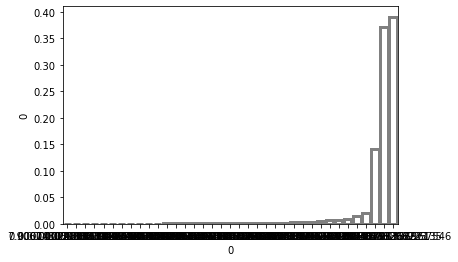

In [111]:
sns.barplot(
    data=d.iloc[:,0], x=d.iloc[:,0], y=d.iloc[:,0],
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

In [ ]:
#may_flights = flights.query("month == 'May'")
#sns.lineplot(daforest_importancesta=forest_importances, x="Feature", y="Rank")

#features = pd.read_excel('modified_features.xlsx')
Newfeatures = modified_features[['Features','Description']]
Newfeatures = Newfeatures.drop(Newfeatures.index[35])
Newfeatures.index = forest_importances.index
Newfeatures['Rank'] = 0
Newfeatures.Rank = forest_importances.iloc[:,0]

In [112]:
d.index=X.columns

In [115]:
d['rank']= d.iloc[:,0]

Newfeatures = Newfeatures.sort_values(by=['Rank'], ascending=False)
Newfeatures.head(40)

In [116]:
forest_importances = d.sort_values(by=['rank'], ascending=False)
#forest_importances.to_excel("forest_importances.xlsx")
forest_importances

,0,rank
m17a,0.391068,0.391068
v401,0.371047,0.371047
m15,0.141913,0.141913
v190,0.020529,0.020529
v122,0.015240,0.015240
v445,0.009616,0.009616
v437,0.007578,0.007578
v701,0.007194,0.007194
v128,0.004726,0.004726
v157v158v159,0.003867,0.003867


# Top 3 Features

In [117]:
forest_importances.head(10)

,0,rank
m17a,0.391068,0.391068
v401,0.371047,0.371047
m15,0.141913,0.141913
v190,0.020529,0.020529
v122,0.015240,0.015240
v445,0.009616,0.009616
v437,0.007578,0.007578
v701,0.007194,0.007194
v128,0.004726,0.004726
v157v158v159,0.003867,0.003867


In [ ]:
*******************************************

In [128]:
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

In [129]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LogisticRegression())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_test, average='micro')

(1.0, 1.0, 1.0, None)

In [130]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', KNeighborsClassifier())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_test, average='micro')

(0.9405666897028334, 0.9405666897028334, 0.9405666897028334, None)

In [131]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', svm.SVC(kernel = 'rbf'))]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_test, average='micro')

(0.986869384934347, 0.986869384934347, 0.986869384934347, None)

In [132]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', RandomForestClassifier())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)
precision_recall_fscore_support(y_test, y_pred_test, average='micro')

(1.0, 1.0, 1.0, None)

In [173]:
 import h2o

In [178]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.351-b10, mixed mode)
  Starting server from C:\Users\ShatiilRahman\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SHATII~1\AppData\Local\Temp\tmpfsewwnp_
  JVM stdout: C:\Users\SHATII~1\AppData\Local\Temp\tmpfsewwnp_\h2o_ShatiilRahman_started_from_python.out
  JVM stderr: C:\Users\SHATII~1\AppData\Local\Temp\tmpfsewwnp_\h2o_ShatiilRahman_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,+06:00
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_ShatiilRahman_s2jyw8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [179]:
from h2o.automl import H2OAutoML

In [191]:
hdf = h2o.H2OFrame(df14)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [192]:
train,test,valid = hdf.split_frame(ratios=[.7, .15])

In [193]:
y = "m17"
x = hdf.columns
x.remove(y)

In [194]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [195]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
18:40:21.510: Project: AutoML_2_20221112_184021
18:40:21.511: Cross-validation disabled by user: no fold column nor nfolds > 1.
18:40:21.511: Setting stopping tolerance adaptively based on the training frame: 0.017180203318601237
18:40:21.511: Build control seed: 10
18:40:21.513: training frame: Frame key: AutoML_2_20221112_184021_training_py_26_sid_bb1c    cols: 38    rows: 3388  chunks: 1    size: 117844  checksum: -8881454782590268012
18:40:21.514: validation frame: Frame key: py_28_sid_bb1c    cols: 38    rows: 708  chunks: 1    size: 26724  checksum: -4304838460543802070
18:40:21.515: leaderboard frame: Frame key: py_28_sid_bb1c    cols: 38    rows: 708  chunks: 1    size: 26724  checksum: -4304838460543802070
18:40:21.515: blending frame: NULL
18:40:21.516: response column: m17
18:40:21.516: fold column: null
18:40:21.516: weights column: null
18:40:21.529: AutoML: XGBoost is not available; skipping it.
18:40:21.530: Loading execution steps: [{XGBoost : [def_2 

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,165.0,165.0,131081.0,1.0,10.0,5.921212,2.0,160.0,58.50909
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-11-12 18:40:39,0.016 sec,0.0,0.4705277,0.4427926,0.2213963,0.4739378,0.4460133,0.2246171
,2022-11-12 18:40:39,0.047 sec,5.0,0.2778419,0.2614646,0.0771961,0.2798556,0.2633664,0.0783191
,2022-11-12 18:40:39,0.063 sec,10.0,0.1640628,0.1543922,0.0269166,0.1652519,0.1555153,0.0273082
,2022-11-12 18:40:39,0.078 sec,15.0,0.0968775,0.0911670,0.0093852,0.0975796,0.0918302,0.0095218
,2022-11-12 18:40:39,0.110 sec,20.0,0.0572052,0.0538332,0.0032724,0.0576198,0.0542248,0.0033200
,2022-11-12 18:40:39,0.125 sec,25.0,0.0337791,0.0317880,0.0011410,0.0340239,0.0320192,0.0011576
,2022-11-12 18:40:39,0.141 sec,30.0,0.0199462,0.0187705,0.0003979,0.0200908,0.0189070,0.0004036
,2022-11-12 18:40:39,0.172 sec,35.0,0.0117780,0.0110838,0.0001387,0.0118634,0.0111644,0.0001407


In [196]:
lb = aml.leaderboard

In [197]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_2_20221112_184021,4.1889e-06,1.75468e-11,2.39388e-06,3.36869e-06,1.75468e-11
GLM_1_AutoML_2_20221112_184021,0.000287179,8.2472e-08,0.000213086,0.000172306,8.2472e-08
GBM_3_AutoML_2_20221112_184021,0.00132616,1.7587e-06,0.000686632,0.00106872,1.7587e-06
GBM_1_AutoML_2_20221112_184021,0.00202954,4.11904e-06,0.000848585,0.0012292,4.11904e-06
DRF_1_AutoML_2_20221112_184021,0.00338762,1.1476e-05,0.000317797,0.00171118,1.1476e-05
GBM_2_AutoML_2_20221112_184021,0.00378539,1.43291e-05,0.0021121,0.00287755,1.43291e-05
GBM_5_AutoML_2_20221112_184021,0.00858372,7.36803e-05,0.00308165,0.00645237,7.36803e-05
GBM_grid_1_AutoML_2_20221112_184021_model_2,0.0157248,0.000247269,0.008588,0.0127991,0.000247269
GBM_grid_1_AutoML_2_20221112_184021_model_1,0.016546,0.00027377,0.00668994,0.0095511,0.00027377
XRT_1_AutoML_2_20221112_184021,0.222614,0.0495571,0.203119,0.186937,0.0495571


In [198]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [200]:
pred.head()

predict
1.00001
0.999989
1
0.999995
-6.67785e-07
2.49202e-07
2.47251e-08
1.00001
0.999994
1.36763e-05


In [201]:
aml.leader.model_performance(train)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.2586537667839436e-12
RMSE: 1.1218973958361538e-06
MAE: 6.600456866520793e-07
RMSLE: 8.270737255887844e-07
Mean Residual Deviance: 1.2586537667839436e-12

In [202]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [203]:
model_ids

['GBM_4_AutoML_2_20221112_184021',
 'GLM_1_AutoML_2_20221112_184021',
 'GBM_3_AutoML_2_20221112_184021',
 'GBM_1_AutoML_2_20221112_184021',
 'DRF_1_AutoML_2_20221112_184021',
 'GBM_2_AutoML_2_20221112_184021',
 'GBM_5_AutoML_2_20221112_184021',
 'GBM_grid_1_AutoML_2_20221112_184021_model_2',
 'GBM_grid_1_AutoML_2_20221112_184021_model_1',
 'XRT_1_AutoML_2_20221112_184021']

In [204]:
h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,165.0,165.0,131081.0,1.0,10.0,5.921212,2.0,160.0,58.50909
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-11-12 18:40:39,0.016 sec,0.0,0.4705277,0.4427926,0.2213963,0.4739378,0.4460133,0.2246171
,2022-11-12 18:40:39,0.047 sec,5.0,0.2778419,0.2614646,0.0771961,0.2798556,0.2633664,0.0783191
,2022-11-12 18:40:39,0.063 sec,10.0,0.1640628,0.1543922,0.0269166,0.1652519,0.1555153,0.0273082
,2022-11-12 18:40:39,0.078 sec,15.0,0.0968775,0.0911670,0.0093852,0.0975796,0.0918302,0.0095218
,2022-11-12 18:40:39,0.110 sec,20.0,0.0572052,0.0538332,0.0032724,0.0576198,0.0542248,0.0033200
,2022-11-12 18:40:39,0.125 sec,25.0,0.0337791,0.0317880,0.0011410,0.0340239,0.0320192,0.0011576
,2022-11-12 18:40:39,0.141 sec,30.0,0.0199462,0.0187705,0.0003979,0.0200908,0.0189070,0.0004036
,2022-11-12 18:40:39,0.172 sec,35.0,0.0117780,0.0110838,0.0001387,0.0118634,0.0111644,0.0001407


In [205]:
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [206]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_2_20221112_184021


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    165                165                         131081                 1            10           5.92121       2             160           58.5091

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.2247204736075894e-12
RMSE: 1.106670896702172e-06
MAE: 6.476557656612262e-07
RMSLE: 8.217788887676387e-07
Mean Residual Deviance: 1.2247204736075894e-12

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 1.7546848245172068e-11
RMSE: 4.188895826488416e-06
MAE: 2.3938754885503945e-06
RMSLE: 3.3686897423389833e-06
Mean Residu

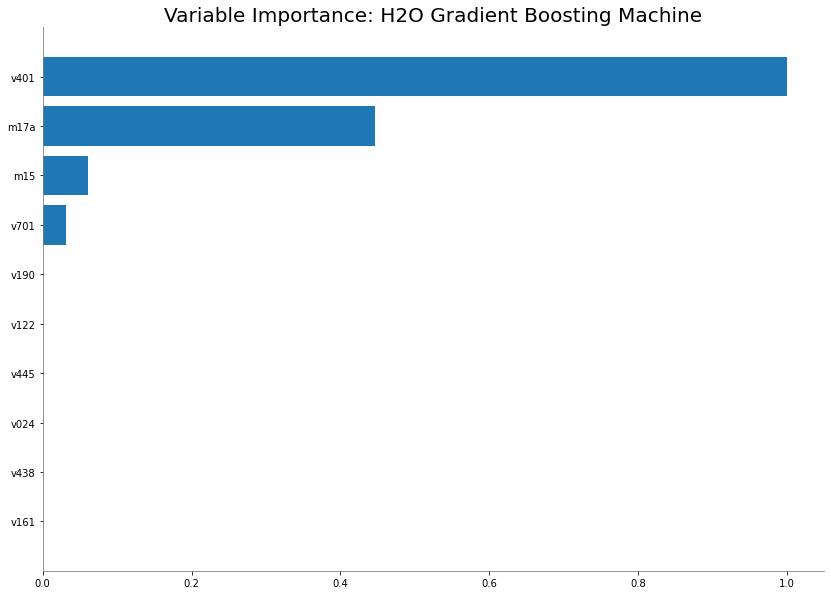

<Figure size 432x288 with 0 Axes>

In [207]:
best_model.varimp_plot()

# Visual

In [ ]:
""""
# Pie Chart
i = 0
plt.pie(fdf.iloc[:,i].value_counts(),labels=fdf.iloc[:,i].value_counts().index, autopct='%.0f%%')
plt.show()
name_of_image = str(fdf.columns[i]) + ".png"
plt.savefig(name_of_image, dpi=1200)
i = i+1


#HistoGram
for i in range(1):
    variable = fdf.iloc[:,i]
    variable_name = features.Description[i]
    
    data = pd.DataFrame(
        {
            variable_name   : fdf.iloc[:,i],
            "encoded number": variable#enc(variable)
        })
    
    #sns.set_palette(sns.color_palette("tab10"))
    g = sns.displot(data, x = variable_name ,hue=variable_name)
    
    
    name_of_image = features.Short_Description[i] + ".png"
    
    #plt.savefig(name_of_image, dpi=1200)
    plt.show()
""""""

In [ ]:
#HistoGram
#for i in range(1):
def histo(i):
    i=i
    variable = fdf3.iloc[:,i]
    variable_name = modified_features.Description[i]#features.Description[i]
    
    data = pd.DataFrame(
        {
            variable_name   : variable,
            "encoded number": variable#enc(variable)
        })
    csfont = {'fontname':'Times New Roman'}
    
    #sns.set_palette(sns.color_palette("tab10"))
    g = sns.displot(data, x = variable_name ,hue=variable_name)
    
    
    #name_of_image = features.Short_Description[i] + ".png"
    csfont = {'fontname':'Times New Roman'}
    hfont = {'fontname':'Helvetica'}

    plt.title(variable_name,**csfont)#
   # plt.xlabel(variable_name, **csfont)   
    #plt.savefig(name_of_image, dpi=1200)
    plt.show()

In [ ]:
histo(10)

In [ ]:
h = 29
histo(h),df3.iloc[:,h].value_counts()

In [ ]:
27  v157    5299 non-null   object
 28  v158    5299 non-null   object
 29  v159

In [ ]:
df3.info()

In [ ]:
pd.DataFrame(encoder.fit_transform(fdf.iloc[:,35])).value_counts()

In [ ]:
fdf.iloc[:,33]

In [ ]:
modified_features.Description[30]

In [ ]:
0,13,17

In [ ]:
sns.boxplot(x=fdf.iloc[:,25])
plt.xlabel(modified_features.Description[25], **csfont)

In [ ]:
fdf.iloc[:,14]

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(fdf, ['m17', 'm17a'])
plt.show()

In [ ]:
a = fdf.m17
b = fdf.v401
ct = pd.crosstab(b, a)

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
p = sns.barplot(x=b, y=stacked.value, hue=a, order=['yes','no'])
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')